In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [2]:
from geoband.API import *

In [3]:
import folium
import json
import geopandas as gpd

### 2.오산시_어린이교통사고_격자

In [4]:
GetCompasData('SBJ_2012_001', '2', '2.오산시_어린이교통사고_격자.geojson')

In [5]:
data = gpd.read_file('2.오산시_어린이교통사고_격자.geojson')
data

,gid,accident_cnt,geometry
0,다사551085,0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,0,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,0,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."
...,...,...,...
4505,다사646052,0,"MULTIPOLYGON (((127.10138 37.14484, 127.10138 ..."
4506,다사646053,0,"MULTIPOLYGON (((127.10138 37.14575, 127.10137 ..."
4507,다사647050,0,"MULTIPOLYGON (((127.10252 37.14305, 127.10251 ..."
4508,다사647051,0,"MULTIPOLYGON (((127.10251 37.14395, 127.10251 ..."


In [94]:
from shapely.geometry import Point, shape, mapping
from shapely.ops import unary_union

max_x = []
max_y = []
min_x = []
min_y = []

for i in range(len(data)):
    coord_x = []
    coord_y = []
    coord = mapping(data.geometry[i])['coordinates']
    for j in range(len(coord[0][0])):
        coord_x.append(coord[0][0][j][0])
        coord_y.append(coord[0][0][j][1])
    max_x.append(max(coord_x))
    max_y.append(max(coord_y))
    min_x.append(min(coord_x))
    min_y.append(min(coord_y))

coord_df = pd.DataFrame({'max_lon':max_x,
                       'max_lat':max_y,
                       'min_lon':min_x,
                       'min_lat':min_y})

new_data = pd.concat([data,coord_df], axis=1)
new_data

,gid,accident_cnt,geometry,max_lon,max_lat,min_lon,min_lat
0,다사551085,0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ...",126.995342,37.175089,126.994210,37.174182
1,다사551086,0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ...",126.995336,37.175990,126.994204,37.175084
2,다사551087,0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ...",126.995330,37.176891,126.994198,37.175985
3,다사551088,0,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ...",126.995324,37.177793,126.994192,37.176887
4,다사552085,0,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ...",126.996469,37.175093,126.995336,37.174187
...,...,...,...,...,...,...,...
4505,다사646052,0,"MULTIPOLYGON (((127.10138 37.14484, 127.10138 ...",127.102510,37.145750,127.101379,37.144845
4506,다사646053,0,"MULTIPOLYGON (((127.10138 37.14575, 127.10137 ...",127.102505,37.146651,127.101374,37.145746
4507,다사647050,0,"MULTIPOLYGON (((127.10252 37.14305, 127.10251 ...",127.103645,37.143951,127.102514,37.143046
4508,다사647051,0,"MULTIPOLYGON (((127.10251 37.14395, 127.10251 ...",127.103640,37.144852,127.102510,37.143947


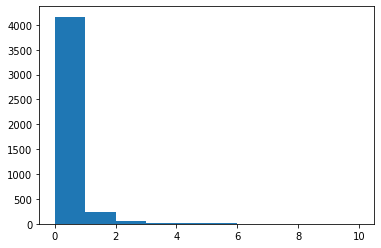

In [6]:
plt.hist(data.iloc[:,1])
plt.show()

In [7]:
sum(data['accident_cnt'])

537

- gid:    격자별 고유 분류코드
- accident_cnt:    격자내 발생한 교통사고 횟수에 대한 값

In [8]:
gdf = data.to_crs(epsg='4326')
converted_json = gdf.to_json()

m = folium.Map(
    location=[37.17508,126.99421],
    zoom_start=13
)

folium.GeoJson(
    converted_json,
).add_to(m)

m

### 23.오산시_상세도로망_LV6

In [9]:
GetCompasData('SBJ_2012_001', '23', '23.오산시_상세도로망_LV6.geojson')

In [10]:
data23 = gpd.read_file('23.오산시_상세도로망_LV6.geojson')
data23.head(5)

,link_id,max_speed,road_name,road_no,road_rank,link_type,road_type,facil_name,up_lanes,dw_lanes,oneway,length,width,car_lane,num_cross,barrier,geometry
0,478344684,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,None,1,0,1,0.472,1,0,0,0,"MULTILINESTRING ((126.99779 37.17385, 126.9979..."
1,478344686,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,None,2,0,1,0.606,2,0,0,0,"MULTILINESTRING ((126.99779 37.17385, 126.9978..."
2,478344690,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,None,1,0,1,0.383,1,0,0,0,"MULTILINESTRING ((127.00104 37.18002, 127.0009..."
3,478344696,60,오산화성고속도로,171,108,2,0,None,1,0,1,0.488,1,0,0,0,"MULTILINESTRING ((126.99614 37.17621, 126.9963..."
4,478344700,40,오산화성고속도로,171,108,2,0,None,1,0,1,0.28,1,0,0,0,"MULTILINESTRING ((126.99770 37.17692, 126.9975..."


In [103]:
max_x = []
max_y = []
min_x = []
min_y = []

for i in range(len(data23)):
    coord_x = []
    coord_y = []
    coord = mapping(data23.geometry[i])['coordinates']
    for j in range(len(coord[0])):
        coord_x.append(coord[0][j][0])
        coord_y.append(coord[0][j][1])
    max_x.append(max(coord_x))
    max_y.append(max(coord_y))
    min_x.append(min(coord_x))
    min_y.append(min(coord_y))

coord_df = pd.DataFrame({'max_lon':max_x,
                       'max_lat':max_y,
                       'min_lon':min_x,
                       'min_lat':min_y})

new_data23 = pd.concat([data23,coord_df], axis=1)
new_data23

,link_id,max_speed,road_name,road_no,road_rank,link_type,road_type,facil_name,up_lanes,dw_lanes,...,length,width,car_lane,num_cross,barrier,geometry,max_lon,max_lat,min_lon,min_lat
0,478344684,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,None,1,0,...,0.472,1,0,0,0,"MULTILINESTRING ((126.99779 37.17385, 126.9979...",127.001931,37.175269,126.997793,37.173851
1,478344686,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,None,2,0,...,0.606,2,0,0,0,"MULTILINESTRING ((126.99779 37.17385, 126.9978...",126.999291,37.178169,126.997492,37.173851
2,478344690,60,수도권제2순환고속도로(봉담동탄,400,108,2,0,None,1,0,...,0.383,1,0,0,0,"MULTILINESTRING ((127.00104 37.18002, 127.0009...",127.001035,37.180016,126.997492,37.178169
3,478344696,60,오산화성고속도로,171,108,2,0,None,1,0,...,0.488,1,0,0,0,"MULTILINESTRING ((126.99614 37.17621, 126.9963...",126.999559,37.177124,126.996144,37.175257
4,478344700,40,오산화성고속도로,171,108,2,0,None,1,0,...,0.28,1,0,0,0,"MULTILINESTRING ((126.99770 37.17692, 126.9975...",126.998602,37.177875,126.997482,37.176863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,571376981,100,수도권제2순환고속도로(봉담동탄,400,101,1,0,None,2,0,...,0.643,2,1,0,0,"MULTILINESTRING ((127.04011 37.17816, 127.0467...",127.046738,37.180527,127.040115,37.178164
1871,571376982,100,수도권제2순환고속도로(봉담동탄,400,101,1,0,None,2,0,...,0.936,2,1,0,0,"MULTILINESTRING ((127.04770 37.18087, 127.0478...",127.057599,37.183732,127.047699,37.180875
1872,571376983,100,수도권제2순환고속도로(봉담동탄,400,101,1,2,세교지하차도,2,0,...,0.093,2,1,0,0,"MULTILINESTRING ((127.04674 37.18053, 127.0477...",127.047699,37.180875,127.046738,37.180527
1873,900000166,0,None,0,107,32768,0,None,1,0,...,0.065,1,0,0,0,"MULTILINESTRING ((127.05992 37.16942, 127.0601...",127.060439,37.169753,127.059917,37.169423


road_rank: 도로등급
road_type: 교통시설물 종류 --> 숫자가 뭘 가르키는 지 안 나와 있다.
facil_name: 해당 시설 명칭
up_lanes: 상행차로수
dw_lanes: 하행차로수
oneway: 일방통행 구분코드
car_lane: 자동차전용도로 구분코드
num_cross: 신호등 수
barrier: 중앙분리대 구분코드

In [35]:
data23.drop('geometry', axis=1).describe(include='all')

,link_id,max_speed,road_name,road_no,road_rank,link_type,road_type,facil_name,up_lanes,dw_lanes,oneway,length,width,car_lane,num_cross,barrier
count,1875,1875,1581,1875,1875,1875,1875,33,1875,1875,1875,1875,1875,1875,1875,1875
unique,1875,10,120,10,6,10,6,26,5,5,2,408,4,2,3,5
top,571200680,0,경기대로,0,107,32768,0,세교터널,1,1,0,0.025,2,0,0,0
freq,1,627,136,1541,1541,1188,1831,4,1015,769,1460,28,751,1849,1846,1507


### 24. 평일_전일,시간대별_오산시_추정교통량_Level6

In [6]:
GetCompasData('SBJ_2012_001', '24', '24.평일_전일,시간대별_오산시_추정교통량_Level6.csv')

In [9]:
data24 = pd.read_csv('24.평일_전일,시간대별_오산시_추정교통량_Level6.csv')
data24.head(5)

/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,전체 추정교통량,승용차 추정교통량,버스 추정교통량,화물차 추정교통량
0,57137697901,101,0.093,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,268.55,193.43,11.99,63.13
1,57135249601,101,0.324,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,21.98,15.48,0.75,5.74
2,57135250601,101,0.333,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,15.77,9.55,1.50,4.73
3,57137696601,101,0.372,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,179.55,135.99,5.22,38.35
4,57137697701,101,0.667,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,0,평일,267.91,192.96,11.96,62.99


In [36]:
data24.describe(include='all')

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,전체 추정교통량,승용차 추정교통량,버스 추정교통량,화물차 추정교통량
count,8.197500e+04,81975.000000,81975.000000,69075,81975,81975,81975,81975,81975,81975.000000,81975.000000,81975.000000,81975.000000
unique,NaN,NaN,NaN,120,1,1,6,49,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,경기대로,경기도,오산시,신장동,전일,평일,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,5750,81975,81975,20275,3279,81975,NaN,NaN,NaN,NaN
mean,5.712641e+10,106.608112,0.120636,NaN,NaN,NaN,NaN,NaN,NaN,483.963280,405.490657,8.755831,69.716644
std,9.326520e+08,1.101092,0.153740,NaN,NaN,NaN,NaN,NaN,NaN,2069.872552,1676.803712,66.802921,347.093994
min,4.783447e+10,101.000000,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,5.712450e+10,107.000000,0.036000,NaN,NaN,NaN,NaN,NaN,NaN,24.470000,20.850000,0.030000,1.450000
50%,5.712523e+10,107.000000,0.074000,NaN,NaN,NaN,NaN,NaN,NaN,96.340000,83.780000,0.360000,10.600000
75%,5.713539e+10,107.000000,0.153000,NaN,NaN,NaN,NaN,NaN,NaN,357.700000,306.990000,3.320000,47.295000


In [38]:
#상세도로망_LinkID와 도로등급은 categorical 정보인데 숫자로 분류되고 있으므로 변환해준다.

for column in ['상세도로망_LinkID', '도로등급']:
    data24[column] = data24[column].apply(str)
    
data24.describe(include='all')

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,전체 추정교통량,승용차 추정교통량,버스 추정교통량,화물차 추정교통량
count,81975,81975,81975.000000,69075,81975,81975,81975,81975,81975,81975.000000,81975.000000,81975.000000,81975.000000
unique,3279,6,NaN,120,1,1,6,49,1,NaN,NaN,NaN,NaN
top,57135367802,107,NaN,경기대로,경기도,오산시,신장동,전일,평일,NaN,NaN,NaN,NaN
freq,25,68150,NaN,5750,81975,81975,20275,3279,81975,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.120636,NaN,NaN,NaN,NaN,NaN,NaN,483.963280,405.490657,8.755831,69.716644
std,NaN,NaN,0.153740,NaN,NaN,NaN,NaN,NaN,NaN,2069.872552,1676.803712,66.802921,347.093994
min,NaN,NaN,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.036000,NaN,NaN,NaN,NaN,NaN,NaN,24.470000,20.850000,0.030000,1.450000
50%,NaN,NaN,0.074000,NaN,NaN,NaN,NaN,NaN,NaN,96.340000,83.780000,0.360000,10.600000
75%,NaN,NaN,0.153000,NaN,NaN,NaN,NaN,NaN,NaN,357.700000,306.990000,3.320000,47.295000


In [63]:
data24[data24['상세도로망_LinkID']=='57135367802']

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,전체 추정교통량,승용차 추정교통량,버스 추정교통량,화물차 추정교통량
6604,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,전일,평일,1039.60,780.59,1.26,257.75
9290,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,10,평일,62.45,47.33,0.08,15.04
15213,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,11,평일,59.85,45.24,0.07,14.54
15950,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,12,평일,57.69,43.49,0.07,14.13
16687,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,13,평일,62.52,47.38,0.08,15.06
17424,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,14,평일,65.35,49.67,0.09,15.59
24627,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,0,평일,6.62,4.00,0.00,2.63
25365,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,1,평일,3.60,2.17,0.00,1.43
27067,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,15,평일,67.66,51.53,0.09,16.03
27804,57135367802,107,0.061,세마역로41번길,경기도,오산시,세마동,16,평일,71.70,54.83,0.11,16.77


### 25. 평일_전일_오산시_혼잡빈도강도_Level6

In [11]:
GetCompasData('SBJ_2012_001', '25', '25.평일_전일_오산시_혼잡빈도강도_Level6.csv')

In [13]:
data25 = pd.read_csv('25.평일_전일_오산시_혼잡빈도강도_Level6.csv')
data25.head(5)

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡빈도강도
0,57125499201,101,1.238,경부고속도로,경기도,오산시,대원동,전일,평일,49.10
1,57125499001,101,1.335,경부고속도로,경기도,오산시,대원동,전일,평일,70.67
2,57137697901,101,0.093,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,42.61
3,57135249601,101,0.324,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,96.75
4,57135250601,101,0.333,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,99.95


In [39]:
data25.describe(include='all')

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡빈도강도
count,3.032000e+03,3032.000000,3032.000000,2650,3032,3032,3032,3032,3032,3032.000000
unique,NaN,NaN,NaN,119,1,1,6,1,1,NaN
top,NaN,NaN,NaN,경기대로,경기도,오산시,신장동,전일,평일,NaN
freq,NaN,NaN,NaN,227,3032,3032,751,3032,3032,NaN
mean,5.714750e+10,106.567282,0.123483,NaN,NaN,NaN,NaN,NaN,NaN,59.354057
std,8.609055e+08,1.132041,0.156877,NaN,NaN,NaN,NaN,NaN,NaN,33.698739
min,4.783447e+10,101.000000,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5.712446e+10,107.000000,0.037000,NaN,NaN,NaN,NaN,NaN,NaN,28.177500
50%,5.712520e+10,107.000000,0.076000,NaN,NaN,NaN,NaN,NaN,NaN,66.225000
75%,5.713539e+10,107.000000,0.157000,NaN,NaN,NaN,NaN,NaN,NaN,91.985000


In [40]:
#상세도로망과 도로등급 데이터 타입 변환

for column in ['상세도로망_LinkID', '도로등급']:
    data25[column] = data25[column].apply(str)
    
data25.describe(include='all')

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡빈도강도
count,3032,3032,3032.000000,2650,3032,3032,3032,3032,3032,3032.000000
unique,3032,5,NaN,119,1,1,6,1,1,NaN
top,57136039201,107,NaN,경기대로,경기도,오산시,신장동,전일,평일,NaN
freq,1,2506,NaN,227,3032,3032,751,3032,3032,NaN
mean,NaN,NaN,0.123483,NaN,NaN,NaN,NaN,NaN,NaN,59.354057
std,NaN,NaN,0.156877,NaN,NaN,NaN,NaN,NaN,NaN,33.698739
min,NaN,NaN,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,0.037000,NaN,NaN,NaN,NaN,NaN,NaN,28.177500
50%,NaN,NaN,0.076000,NaN,NaN,NaN,NaN,NaN,NaN,66.225000
75%,NaN,NaN,0.157000,NaN,NaN,NaN,NaN,NaN,NaN,91.985000


In [46]:
data25_part = data25.loc[:, ['상세도로망_LinkID', '혼잡빈도강도']]
data25_part.head(5)

,상세도로망_LinkID,혼잡빈도강도
0,57125499201,49.10
1,57125499001,70.67
2,57137697901,42.61
3,57135249601,96.75
4,57135250601,99.95


### 26.평일_전일_오산시_혼잡시간강도_Level6

In [14]:
GetCompasData('SBJ_2012_001', '26', '26.평일_전일_오산시_혼잡시간강도_Level6.csv')

In [16]:
data26=pd.read_csv('26.평일_전일_오산시_혼잡시간강도_Level6.csv')
data26.head(5)

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡시간강도
0,57125499201,101,1.238,경부고속도로,경기도,오산시,대원동,전일,평일,59.66
1,57125499001,101,1.335,경부고속도로,경기도,오산시,대원동,전일,평일,77.13
2,57137697901,101,0.093,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,50.79
3,57135249601,101,0.324,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,99.75
4,57135250601,101,0.333,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,99.99


In [41]:
data26.describe(include='all')

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡시간강도
count,3.032000e+03,3032.000000,3032.000000,2650,3032,3032,3032,3032,3032,3032.000000
unique,NaN,NaN,NaN,119,1,1,6,1,1,NaN
top,NaN,NaN,NaN,경기대로,경기도,오산시,신장동,전일,평일,NaN
freq,NaN,NaN,NaN,227,3032,3032,751,3032,3032,NaN
mean,5.714750e+10,106.567282,0.123483,NaN,NaN,NaN,NaN,NaN,NaN,74.829852
std,8.609055e+08,1.132041,0.156877,NaN,NaN,NaN,NaN,NaN,NaN,29.287752
min,4.783447e+10,101.000000,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5.712446e+10,107.000000,0.037000,NaN,NaN,NaN,NaN,NaN,NaN,58.455000
50%,5.712520e+10,107.000000,0.076000,NaN,NaN,NaN,NaN,NaN,NaN,88.000000
75%,5.713539e+10,107.000000,0.157000,NaN,NaN,NaN,NaN,NaN,NaN,98.160000


In [42]:
#상세도로망과 도로등급 데이터 타입 변환

for column in ['상세도로망_LinkID', '도로등급']:
    data26[column] = data26[column].apply(str)
    
data26.describe(include='all')

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡시간강도
count,3032,3032,3032.000000,2650,3032,3032,3032,3032,3032,3032.000000
unique,3032,5,NaN,119,1,1,6,1,1,NaN
top,57136039201,107,NaN,경기대로,경기도,오산시,신장동,전일,평일,NaN
freq,1,2506,NaN,227,3032,3032,751,3032,3032,NaN
mean,NaN,NaN,0.123483,NaN,NaN,NaN,NaN,NaN,NaN,74.829852
std,NaN,NaN,0.156877,NaN,NaN,NaN,NaN,NaN,NaN,29.287752
min,NaN,NaN,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,0.037000,NaN,NaN,NaN,NaN,NaN,NaN,58.455000
50%,NaN,NaN,0.076000,NaN,NaN,NaN,NaN,NaN,NaN,88.000000
75%,NaN,NaN,0.157000,NaN,NaN,NaN,NaN,NaN,NaN,98.160000


### 혼잡빈도강도 + 혼잡시간강도

In [49]:
df25_26 = pd.merge(data25_part, data26, on='상세도로망_LinkID', how='outer')
df25_26 = df25_26[['상세도로망_LinkID', '도로등급', '링크길이', '도로명', '시도명', '시군구명', '읍면동명', '시간적범위', '평일주말', '혼잡시간강도', '혼잡빈도강도']]
df25_26.head(5)

,상세도로망_LinkID,도로등급,링크길이,도로명,시도명,시군구명,읍면동명,시간적범위,평일주말,혼잡시간강도,혼잡빈도강도
0,57125499201,101,1.238,경부고속도로,경기도,오산시,대원동,전일,평일,59.66,49.10
1,57125499001,101,1.335,경부고속도로,경기도,오산시,대원동,전일,평일,77.13,70.67
2,57137697901,101,0.093,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,50.79,42.61
3,57135249601,101,0.324,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,99.75,96.75
4,57135250601,101,0.333,수도권제2순환고속도로(봉담동탄,경기도,오산시,세마동,전일,평일,99.99,99.95
